<a href="https://colab.research.google.com/github/CloaizaF/Trabajo_TAE_1/blob/main/Trabajo_TAE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicción de la satisfacción de niños y abuelos según la composición de su hogar y otros determinantes

Objetivo:
Desarrollar y productizar un modelo predictivo para predecir el nivel de satisfacción de niños y de abuelos de acuerdo a la composición del hogar y otros determinantes.

Descripción
El insumo principal de este trabajo son los datos de la Encuesta de Calidad de Vida del DANE. Esta encuesta recoge información de los hogares de Colombia y permite estudiar su composición, sus condiciones socioeconómicas, de satisfacción con la vida, etc.

Para este trabajo la variable a predecir es el nivel de satisfacción con la vida y se enfocará en dos tipos de sujetos: niños y abuelos. Ambas definiciones deberán especificarse en el trabajo. Es posible que los analistas decidan que para tener un buen modelo es necesario tener subgrupos y uno o varios modelos para cada grupo. La creación de las variables explicativas es parte del trabajo.

## Importación de librerías

In [ ]:
!pip install -U -q PyDrive
!pip install joblib
!pip install -U matplotlib

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from pandas import errors
from os import error
import joblib

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from math import sqrt
 


In [ ]:
# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

##Lectura de datos

In [ ]:
#Path to the table 'Caracteristicas y composicion del hogar'
home_composition_path = 'https://drive.google.com/file/d/1YO2dMEpEunsIcIC4xW24YADZc-SwIe1_/view'
#Path to the table 'Condiciones de vida del hogar y tenencia de bienes programas'
home_life_conditions_path = 'https://drive.google.com/file/d/1m84CPMj1yf7KNSU2t-E30oo5ZX6a7WVF/view'
#Path to the table 'Servicios del hogar'
home_services_path = 'https://drive.google.com/file/d/15vyyW3PiJfbMkJ2VEMEdSmAZ80Hd9KCB/view'

#Read the information from the table 'Caracteristicas y composicion del hogar'
id1 = home_composition_path.split("/")[-2]
downloaded = drive.CreateFile({'id' : id1})
downloaded.GetContentFile('xclara.csv') 
home_composition_df = pd.read_csv('xclara.csv', sep = ";")

#Read the information from the table 'Condiciones de vida del hogar y tenencia de bienes programas'
id2 = home_life_conditions_path.split("/")[-2]
downloaded = drive.CreateFile({'id' : id2})
downloaded.GetContentFile('xclara1.csv') 
home_life_conditions_df = pd.read_csv('xclara1.csv', sep = ";")

#Read the information from the table 'Servicios del hogar'
id3 = home_services_path.split("/")[-2]
downloaded = drive.CreateFile({'id' : id3})
downloaded.GetContentFile('xclara2.csv') 
home_services_df = pd.read_csv('xclara2.csv', sep = ";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Check some of the information in the table 'Caracteristicas y composicion del hogar'
demonstration_df = home_composition_df[home_composition_df.columns[0:15]]
demonstration_df.head()

,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,FEX_C,P6016,P1894,P6020,P6034,P6040,P6051,P5502,P6071,P6071S1,P756
0,7247300,1,1,1,"513,690888685872",1,3,2,1,71,1,2,1,2,2
1,7247300,2,1,2,"513,690888685872",2,3,1,1,67,2,2,1,1,1
2,7247300,3,1,3,"513,690888685872",3,3,1,1,64,7,4,,,1
3,7247301,1,1,1,"482,968200558387",1,3,1,1,84,1,6,1,2,2
4,7247301,2,1,2,"482,968200558387",2,3,2,1,76,2,6,1,1,2


In [ ]:
##Check some of the information in the table 'Condiciones de vida del hogar y tenencia de bienes programas'
demonstration1_df = home_life_conditions_df[home_life_conditions_df.columns[0:15]]
demonstration1_df.head()

,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,FEX_C,P1079,P9010,P9025,P9025S1,P9025S2,P9030,P9040,P9050,P5230,P9090
0,7247300,1,1,1,"513,690888685872",1,1,,2,2,3,2,3,2,1
1,7247301,1,1,1,"482,968200558387",1,1,,2,2,2,1,1,1,3
2,7247302,1,1,1,"488,435003344741",2,1,,2,2,2,3,3,2,2
3,7247303,1,1,1,"537,650078997481",1,1,,2,2,2,1,1,1,2
4,7247304,1,1,1,"438,176736860409",2,1,,2,2,2,1,1,2,2


In [ ]:
##Check some of the information in the table 'Servicios del hogar'
demonstration2_df = home_services_df[home_services_df.columns[0:15]]
demonstration2_df.head()

,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,FEX_C,P5000,P5010,P3161,P791,P5018,P5018S1,P5666,P3162,P3163,P3163S1
0,7247300,1,1,1,"513,690888685872",4,2,2,1,70720,1,1,1,43000,1
1,7247301,1,1,1,"482,968200558387",2,1,1,1,102000,1,1,1,22000,1
2,7247302,1,1,1,"488,435003344741",4,3,3,1,150000,1,1,1,50000,1
3,7247303,1,1,1,"537,650078997481",2,2,2,1,145000,1,1,1,45000,1
4,7247304,1,1,1,"438,176736860409",2,2,2,1,83000,1,1,1,15000,1


##Preprocesamiento de datos

###Preprocesamiento de datos para los abuelos

In [ ]:
#Extract the columns from the home_composition_df that will be used 
#for data treatment. The columns that will be used are: 'DIRECTORIO', 
#'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 
#'P6051'(relationship with the head of the family)
relationships_df = home_composition_df[["DIRECTORIO", "SECUENCIA_ENCUESTA",
                                  "SECUENCIA_P", "P6051"]]
relationships_df.rename(columns={"DIRECTORIO":"DIRECTORY", 
                           "SECUENCIA_ENCUESTA":"SEQ_SURVEY",
                           "SECUENCIA_P":"SEQ_P", 
                           "P6051":"RELATIONSHIP"}, inplace=True)
relationships_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,DIRECTORY,SEQ_SURVEY,SEQ_P,RELATIONSHIP
0,7247300,1,1,1
1,7247300,2,1,2
2,7247300,3,1,7
3,7247301,1,1,1
4,7247301,2,1,2
...,...,...,...,...
267080,7407011,5,1,3
267081,7407013,1,1,1
267082,7407013,2,1,3
267083,7407013,3,1,3


In [ ]:
#Select the information that will be used in the data treatment
selected_relationships_df = relationships_df["RELATIONSHIP"] < 7
selected_relationships_df = relationships_df[selected_relationships_df]
selected_relationships_df

,DIRECTORY,SEQ_SURVEY,SEQ_P,RELATIONSHIP
0,7247300,1,1,1
1,7247300,2,1,2
3,7247301,1,1,1
4,7247301,2,1,2
5,7247302,1,1,1
...,...,...,...,...
267080,7407011,5,1,3
267081,7407013,1,1,1
267082,7407013,2,1,3
267083,7407013,3,1,3


In [ ]:
def get_home_members(df, directory, seq_p): 
  """
    Gets the members of a home
    Arguments:
        df: a pandas dataframe
        directory: an integer
        seq_p: an integer
    Returns:
        A pandas dataframe with the members of a home
    """
  return df[(df['DIRECTORY'] == directory) & (df['SEQ_P'] == seq_p)]

In [ ]:
def get_members_relationships(relationships_df):
  """
    Gets the relationships between the members of a home
    Arguments:
        relationships_df: a pandas dataframe
    Returns:
        A pandas dataframe with the members of a home
    """
  relationships_dict = {'1': [], '2': [], '3': [], '4': [], '5': [], '6': []}
  for i in relationships_df.index:
    relationships_dict[str(relationships_df["RELATIONSHIP"][i])].append(
        (relationships_df['DIRECTORY'][i], relationships_df['SEQ_P'][i], 
         relationships_df['SEQ_SURVEY'][i]))
  return relationships_dict

In [ ]:
def get_grandparents(relationships_dict):
  """
    Gets the grandparents of a home
    Arguments:
        relationships_dict: a dictionary
    Returns:
        A list with the grandparents of a home
    """

  grandparents=[]
  #Case in which the grandparent is the head of family
  if len(relationships_dict["4"]) != 0:

    #Get the grandparent
    grandparent = relationships_dict["1"][0]
    grandparents.append((grandparent[0], grandparent[1], grandparent[2]))

    #Get the grandparent's couple
    if len(relationships_dict["2"]) != 0:
      for i in relationships_dict["2"]:
        grandparents.append((i[0], i[1], i[2]))

    #Get the great grandparents
    if len(relationships_dict["6"]) != 0 and len(relationships_dict["3"]) != 0:
      for i in relationships_dict["6"]:
        grandparents.append((i[0], i[1], i[2]))

    if len(relationships_dict["5"]) != 0 and len(relationships_dict["3"]) != 0:
      for i in relationships_dict["5"]:
        grandparents.append((i[0], i[1], i[2]))

  elif (len(relationships_dict["3"]) != 0 and 
    (len(relationships_dict["5"]) != 0 or len(relationships_dict["6"]) != 0)):
    
    if len(relationships_dict["5"]):
      for i in relationships_dict["5"]:
        grandparents.append((i[0], i[1], i[2]))

    if len(relationships_dict["6"]):
      for i in relationships_dict["6"]:
        grandparents.append((i[0], i[1], i[2]))

  return grandparents

In [ ]:
#Extract all the grandparents from all the houses
#Uncomment & run this code only once

#all_directories = list(home_life_conditions_df['DIRECTORIO'])
#unique_directories = home_life_conditions_df['DIRECTORIO'].unique()

#grandparents_df = pd.DataFrame(columns=["DIRECTORY", "SEQ_P", "SEQ_SURVEY",
#                                        "RELATIONSHIP"])

#for directory in unique_directories:
#  homes_per_directory = all_directories.count(directory)
#  for home in range(1, homes_per_directory + 1):
#    home_members = get_home_members(selected_relationships_df, directory, home)
#    grandparents = (get_grandparents(get_members_relationships((home_members))))

#    for grandparent in grandparents:
#      personas_en_directorio = (home_members[
#      (home_members.DIRECTORY == grandparent[0]) 
#      & (home_members.SEQ_P == grandparent[1]) 
#      & (home_members.SEQ_SURVEY == grandparent[2]) ])

#      grandparents_df = pd.concat([grandparents_df, personas_en_directorio])

In [ ]:
#Save all the grandparents to a csv
#Uncomment & run this code only once
#grandparents_df.to_csv('grandparents.csv', encoding = 'utf-8', index=False)

In [ ]:
#Path to the created table 'grandparents'
grandparents_path = 'https://drive.google.com/file/d/1u8LBUJvTcxHhw3D-JzpRES5T8fta2lAv/view?usp=sharing'

#Read the information from the table 'grandparents'
id4 = grandparents_path.split("/")[-2]
downloaded = drive.CreateFile({'id' : id4})
downloaded.GetContentFile('xclara3.csv') 
grandparents_df = pd.read_csv('xclara3.csv', sep = ",")

###Preprocesamiento de datos para los niños

In [ ]:
#Create the kids dataframe 
all_kids_df = home_composition_df[(home_composition_df['P6040'] >= 15) 
            & (home_composition_df['P6040'] < 19)]

In [ ]:
#Merge the information from all_kids_df & home_life_conditions_df
#to have an unified dataframe with the information or the kids
kids_info_df = pd.merge(all_kids_df, home_life_conditions_df[['DIRECTORIO',
                      'SECUENCIA_ENCUESTA','P1077S8','P1077S10','P1077S13',
                      'P1077S14','P1077S15A1','P1077S16A1','P1077S17',
                      'P1077S21A1','P1077S22A1','P1077S23A1','P9030',
                      'P9040','P9050','P5230','P1075']],
                 how = 'inner', left_on = ['DIRECTORIO','SECUENCIA_P'],
                 right_on = ['DIRECTORIO','SECUENCIA_ENCUESTA'])

In [ ]:
#Replace the null values for zero in some variables that will be used
kids_info_df[['P1077S8','P1077S10','P1077S13','P1077S14','P1077S15A1','P1077S16A1',
            'P1077S17','P1077S21A1','P1077S22A1','P1077S23A1']] = kids_info_df[
              ['P1077S8','P1077S10','P1077S13','P1077S14','P1077S15A1','P1077S16A1',
               'P1077S17','P1077S21A1','P1077S22A1','P1077S23A1']].replace(r'^\s*$', 0, regex=True)

In [ ]:
#Change the variables' types for the variables that will be analyzed
kids_info_df[['P1077S8','P1077S10','P1077S13','P1077S14','P1077S15A1','P1077S16A1',
            'P1077S17','P1077S21A1','P1077S22A1','P1077S23A1','P1895','P1896',
            'P1897','P1898','P1899','P3175','P1901','P1903','P1904','P1905',
            'P1927']] = kids_info_df[['P1077S8','P1077S10','P1077S13','P1077S14',
            'P1077S15A1','P1077S16A1','P1077S17','P1077S21A1','P1077S22A1',
            'P1077S23A1','P1895','P1896','P1897','P1898','P1899','P3175','P1901',
            'P1903','P1904','P1905','P1927']].astype(np.int64,errors='ignore')
kids_info_df['P1895'] = kids_info_df['P1895'].astype(np.int64)

##Análisis descriptivo para los abuelos y los niños

###Análisis de datos por individuos

Ahora se analizarán los datos de los abuelos y los niños como individuos.

Se observa una muestra del conjunto de datos de los niños que se analizará y un resumen de las variables cuantitativas de este: 


In [ ]:
# Get information for the analysis of the kids
kids_to_analize = home_composition_df.loc[all_kids_df.index, :][['P6020',
                                                                    'P6040',
                                                                    'P6080']]
kids_to_analize.replace(r'^\s*$', 0, regex=True, inplace=True)
kids_to_analize = kids_to_analize.astype(np.int64)
kids_type = ['Kids' for i in kids_to_analize['P6020']]
kids_to_analize['Type'] = kids_type
kids_to_analize.rename(columns={'P6020':'Gender','P6040':'Age',
                                'P6080':'Etnicity/Culture'},inplace=True)
kids_to_analize['Gender'].replace([1,2],['Male','Female'], inplace=True)
kids_to_analize['Etnicity/Culture'].replace({1:'Indigenous',2:'Gipsy',3:'Raizal',4:'Palenquero',5:'Afrocolombian',
                6:'None'},inplace=True)
kids_to_analize.head()

,Gender,Age,Etnicity/Culture,Type
13,Male,15,None,Kids
31,Male,15,None,Kids
47,Male,17,None,Kids
57,Male,15,None,Kids
96,Female,18,None,Kids


In [ ]:
# Show some information about the variables for the kids
kids_to_analize.describe()

,Age
count,18626.000000
mean,16.444647
std,1.111874
min,15.000000
25%,15.000000
50%,16.000000
75%,17.000000
max,18.000000


Se observa que el rango de edad de los niños es de 15 a 18 años.

Luego se presenta una muestra del conjunto de datos de los abuelos que se analizará y un resumen de las variables cuantitativas de este:

In [ ]:
# Get information for the analysis of the grandparents
grandparents_to_analyze = pd.merge(home_composition_df,grandparents_df,how='inner',
                               left_on=['DIRECTORIO','SECUENCIA_P',
                                        'SECUENCIA_ENCUESTA'],
                               right_on=['DIRECTORY','SEQ_P','SEQ_SURVEY'])
grandparents_to_analyze = grandparents_to_analyze[['P6020','P6040','P6080']]
grandparents_to_analyze.replace(r'^\s*$', 0, regex=True, inplace=True)
grandparents_to_analyze = grandparents_to_analyze.astype(np.int64)
grandparents_type = ['Grandparents' for i in grandparents_to_analyze['P6020']]
grandparents_to_analyze['Type'] = grandparents_type
grandparents_to_analyze.rename(columns={'P6020':'Gender','P6040':'Age',
                                'P6080':'Etnicity/Culture'},inplace=True)
grandparents_to_analyze['Gender'].replace([1,2],['Male','Female'], inplace=True)
grandparents_to_analyze['Etnicity/Culture'].replace({1:'Indigenous',2:'Gipsy',3:'Raizal',4:'Palenquero',5:'Afrocolombian',
                6:'None'},inplace=True)
grandparents_to_analyze.head()

,Gender,Age,Etnicity/Culture,Type
0,Male,59,None,Grandparents
1,Female,56,None,Grandparents
2,Female,75,None,Grandparents
3,Male,81,Afrocolombian,Grandparents
4,Female,64,None,Grandparents


In [ ]:
# Show some information about the variables for the kids
grandparents_to_analyze.describe()

,Age
count,17081.000000
mean,60.947954
std,12.460290
min,16.000000
25%,52.000000
50%,60.000000
75%,69.000000
max,105.000000


Se observa que el rango de edad de los abuelos es de 16 a 105 años.

In [ ]:
# Concatenate the kids data and the grandparents data for analysis and comparisons
data = pd.concat([kids_to_analize,grandparents_to_analyze])
data

,Gender,Age,Etnicity/Culture,Type
13,Male,15,None,Kids
31,Male,15,None,Kids
47,Male,17,None,Kids
57,Male,15,None,Kids
96,Female,18,None,Kids
...,...,...,...,...
17076,Female,54,None,Grandparents
17077,Male,33,None,Grandparents
17078,Female,48,None,Grandparents
17079,Male,70,Indigenous,Grandparents


####Análisis de individuos por el sexo

Seguidamente se representan los datos del sexo por medio de un gráfico de barras comparativo, donde se muestra la cantidad de niños y abuelos con sexo masculino y femenino.

In [ ]:
# Group the data by its gender and type of person
gender = data.groupby(['Gender','Type'], as_index=False)['Age'].count()
gender.rename(columns={'Age':'Quantity'}, inplace=True)

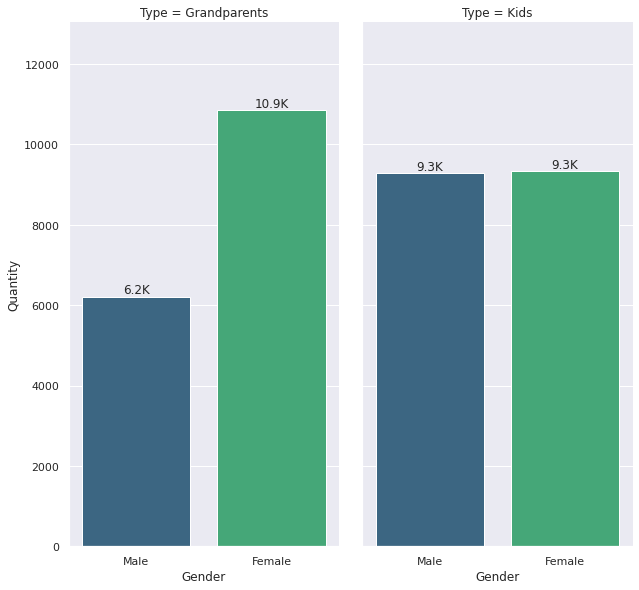

In [ ]:
# Categorical barplot of the genre data
sb.set(font_scale=1)
gender_graph = sb.catplot(x="Gender",y="Quantity",col="Type",data=gender,kind="bar",
                       height=4,aspect=.7,palette='viridis')

plt.gcf().set_size_inches(10, 10)
for ax in gender_graph.axes.ravel():   
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

Se nota que para los abuelos hay más mujeres que hombres mientras que para los niños las cantidades de niños y niñas son similares.

####Análisis de datos por la edad

Ahora se representan los datos de edad, los cuales se dividen en edad de niños y edad de abuelos.

Edad de niños:

In [ ]:
# Group the data by the kid's age 
age_kids = kids_to_analize.groupby(['Age'],as_index=False)['Gender'].count()
age_kids.rename(columns={'Gender':'Quantity'},inplace=True)

[Text(0, 0, '4883'),
 Text(0, 0, '4908'),
 Text(0, 0, '4505'),
 Text(0, 0, '4330')]

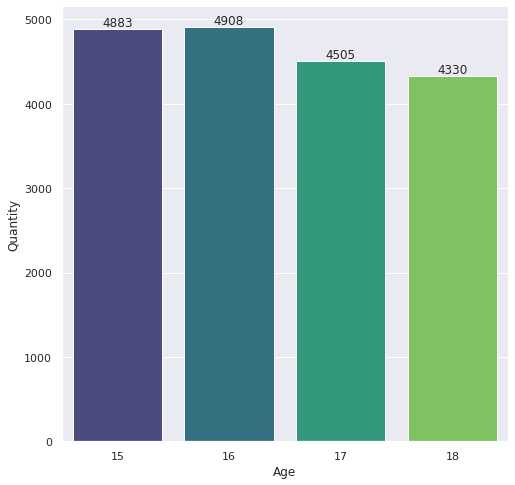

In [ ]:
# Show in a categorical barplot the kids quantity for every age
sb.set(font_scale=1)
age_kids_graph = sb.barplot(x='Age',y='Quantity',data=age_kids,palette='viridis')
plt.gcf().set_size_inches(8, 8)
age_kids_graph.bar_label(age_kids_graph.containers[0])

Se nota que las proporciones de edades de los niños son similares.

Edades de abuelos:

In [ ]:
# Group the data by the grandparent's age 
age_grandparents = grandparents_to_analyze.groupby(['Age'],as_index=False)['Gender'].count()
age_grandparents.rename(columns={'Gender':'Quantity'},inplace=True)
age_grandparents.head()

,Age,Quantity
0,16,2
1,17,1
2,18,4
3,19,7
4,20,2


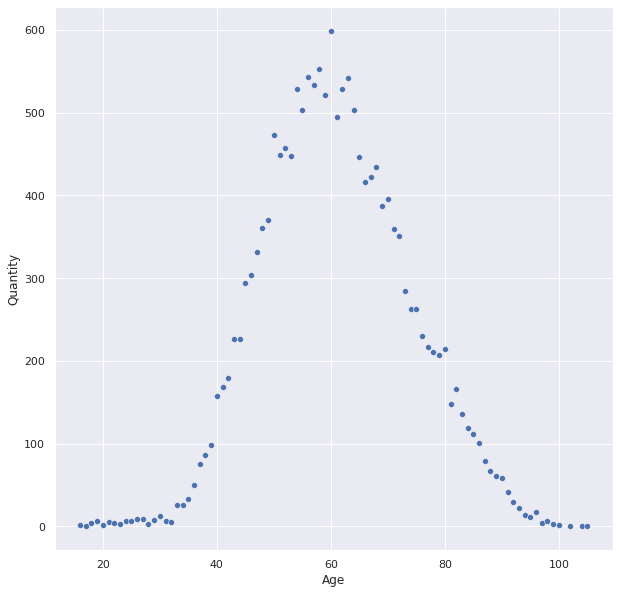

In [ ]:
# Show in a scatterplot the grandparents quantity for every age
# Chose scatterplot because of a large range of ages (Between 16 and 105 years)
sb.set(font_scale=1)
plt.rcParams['figure.figsize'] = (10, 10)
age_gramps_graph = sb.scatterplot(data=age_grandparents, x="Age", y="Quantity")

Cabe aclarar que se utilizó una gráfica diferente al gráfico de barras utilizado para las edades de los niños debido al rango de edad de los abuelos, por lo que se decidió realizar un gráfico de dispersión Edad vs Cantidad para mostrar la cantidad de personas en cierto rango de edad de los abuelos. Al mirar la gráfica se observa que la mayoría de los abuelos se encuentran entre los 40 y los 80 años de edad.

####Análisis de datos según la etnia, pueblo o cultura

Después se representan los datos de las etnias/culturas tanto de los niños como de los abuelos en un gráfico de barras comparativo.

In [ ]:
# Group the data by etnicity/culture
etnicities = data.groupby(['Etnicity/Culture','Type'], as_index=False)['Gender'].count()
etnicities.rename(columns={'Gender':'Quantity'},inplace=True)

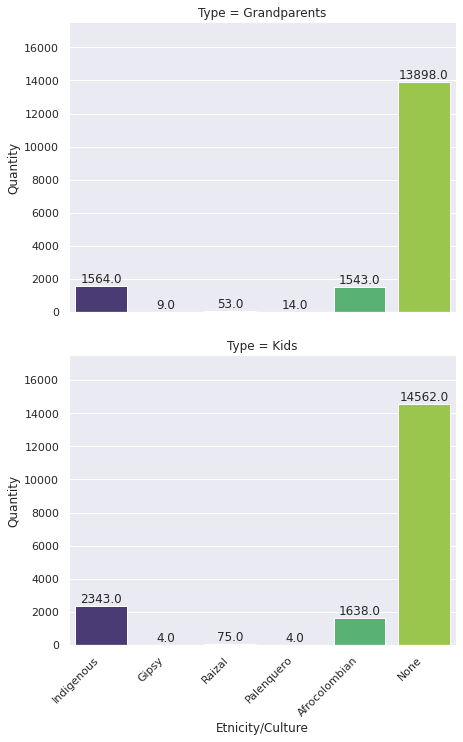

In [ ]:
# Categorical barplot for the different etnicities
sb.set(font_scale=1)
culture_graph = sb.catplot(x="Etnicity/Culture",y="Quantity",row="Type",
                           data=etnicities,kind="bar",height=4,aspect=.7,
                           palette='viridis')
plt.gcf().set_size_inches(10, 10)
plt.xticks(
    rotation=45, 
    horizontalalignment='right'  
)

for ax in culture_graph.axes.ravel():    
    for c in ax.containers:
        labels = [f'{v.get_height()}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

Se aprecia que la mayoría de abuelos y niños no pertenecen a una etnia o cultura en específico y que en los datos hay muy poca representación de otras etnias y culturas.

###Análisis de datos por hogares

Ahora se analizarán los datos de los hogares donde viven los abuelos y los niños.

Se observa una muestra del conjunto de datos de los niños que se analizará y un resumen de las variables cualitativas de este: 

In [ ]:
# Get the information of every home where a kid lives
kids_home = pd.merge(all_kids_df,home_life_conditions_df[['DIRECTORIO',
                                                           'SECUENCIA_ENCUESTA',
                                                           'P9010','P5230',
                                                           'P1075']],how='inner',
                      left_on=['DIRECTORIO','SECUENCIA_P'],
                      right_on=['DIRECTORIO','SECUENCIA_ENCUESTA'])[['DIRECTORIO',
                                                                     'P9010',
                                                                     'P5230',
                                                                     'P1075']]
kids_home = kids_home[['DIRECTORIO','P9010','P5230','P1075']]
kids_home.drop_duplicates(subset=['DIRECTORIO'],inplace=True)
kids_home.drop(columns=['DIRECTORIO'],inplace=True)
kids_home_type = ['Kids' for i in kids_home['P9010']]
kids_home['Type'] = kids_home_type
kids_home.rename(columns={'P9010':'Security','P5230':'Poverty',
                           'P1075':'Internet'},inplace=True)
kids_home['Security'].replace({1:'Secure',2:'Insecure'},inplace=True)
kids_home['Poverty'].replace({1:'Yes',2:'No'},inplace=True)
kids_home['Internet'].replace({1:'Yes',2:'No'},inplace=True)
kids_home.head()

,Security,Poverty,Internet,Type
0,Secure,Yes,Yes,Kids
1,Secure,Yes,Yes,Kids
2,Insecure,Yes,Yes,Kids
3,Secure,No,Yes,Kids
4,Secure,No,No,Kids


In [ ]:
# Show information of the different variables to analyze
kids_home.describe()

,Security,Poverty,Internet,Type
count,16174,16174,16174,16174
unique,2,2,2,1
top,Secure,Yes,No,Kids
freq,13941,8552,9025,16174


Se aprecia que la gran parte de los hogares encuestados considera que están seguros, que se encuentran en la pobreza y dicen no tener internet.

Luego se observa una muestra del conjunto de datos de los abuelos que se analizará y un resumen de las variables cualitativas de este: 

In [ ]:
# Get the information of every home where a grandparent lives
grandparents_info = pd.merge(home_composition_df,grandparents_df,how='inner',
                               left_on=['DIRECTORIO','SECUENCIA_P',
                                        'SECUENCIA_ENCUESTA'],
                               right_on=['DIRECTORY','SEQ_P','SEQ_SURVEY'])
grandparents_home = pd.merge(grandparents_info,home_life_conditions_df[['DIRECTORIO',
                                                                   'SECUENCIA_ENCUESTA',
                                                                   'P9010',
                                                                   'P5230',
                                                                   'P1075']],
                        how='inner',left_on=['DIRECTORIO','SECUENCIA_P'],
                        right_on=['DIRECTORIO','SECUENCIA_ENCUESTA'])[['DIRECTORIO',
                                                                     'P9010',
                                                                     'P5230',
                                                                     'P1075']]

grandparents_home.drop_duplicates(subset=['DIRECTORIO'],inplace=True)
grandparents_home.drop(columns=['DIRECTORIO'],inplace=True)
grandparents_home_type = ['Grandparents' for i in grandparents_home['P9010']]
grandparents_home['Type'] = grandparents_home_type
grandparents_home.rename(columns={'P9010':'Security','P5230':'Poverty',
                           'P1075':'Internet'},inplace=True)
grandparents_home['Security'].replace({1:'Secure',2:'Insecure'},inplace=True)
grandparents_home['Poverty'].replace({1:'Yes',2:'No'},inplace=True)
grandparents_home['Internet'].replace({1:'Yes',2:'No'},inplace=True)
grandparents_home.head()

,Security,Poverty,Internet,Type
0,Secure,No,Yes,Grandparents
3,Secure,Yes,Yes,Grandparents
4,Secure,No,Yes,Grandparents
5,Secure,No,No,Grandparents
6,Secure,No,Yes,Grandparents


In [ ]:
# Show information of the different variables to analyze
grandparents_home.describe()

,Security,Poverty,Internet,Type
count,11721,11721,11721,11721
unique,2,2,2,1
top,Secure,Yes,No,Grandparents
freq,10019,6154,6389,11721


Se observa que la mayoría de los hogares en los que residen abuelos se encuentran en condiciones similares a los hogares en los que residen los niños.

In [ ]:
# Concatenates the data
data_home = pd.concat([kids_home,grandparents_home])
data_home

,Security,Poverty,Internet,Type
0,Secure,Yes,Yes,Kids
1,Secure,Yes,Yes,Kids
2,Insecure,Yes,Yes,Kids
3,Secure,No,Yes,Kids
4,Secure,No,No,Kids
...,...,...,...,...
17074,Secure,Yes,No,Grandparents
17075,Secure,Yes,No,Grandparents
17076,Secure,Yes,No,Grandparents
17077,Secure,Yes,No,Grandparents


####Análisis de datos de sentimiento de seguridad

Ahora se representan los datos de sentimiento de seguridad en los hogares donde residen los niños por medio de un gráfico de barras comparativo.

In [ ]:
home_security = data_home.groupby(['Security','Type'], as_index=False)['Poverty'].count()
home_security.rename(columns={'Poverty':"Homes"},inplace=True)
home_security['Security'].replace({1:'Secure',2:'Insecure'},inplace=True)

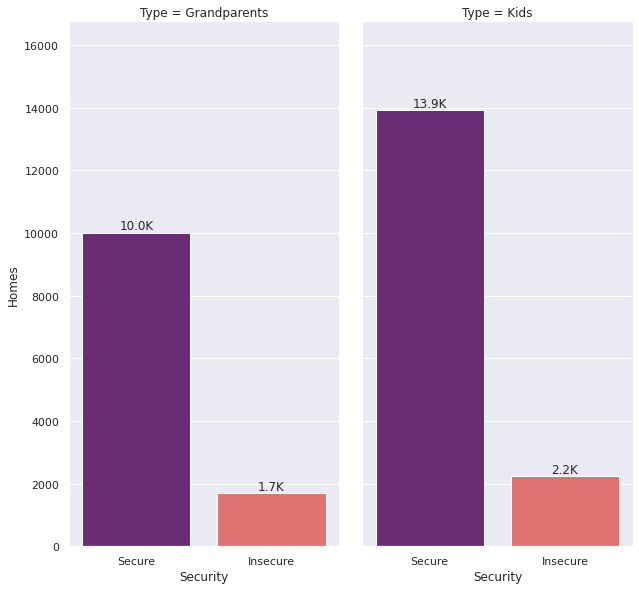

In [ ]:
sb.set(font_scale=1)
security_graph = sb.catplot(x="Security",y="Homes",col="Type",data=home_security,
                            kind="bar",height=4,aspect=.7,palette='magma')

plt.gcf().set_size_inches(10, 10)
for ax in security_graph.axes.ravel():
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

Al analizar el gráfico se observa que la mayoría de hogares donde residen los abuelos y los niños se sienten seguros.

####Análisis de datos según sentimiento de pobreza

Luego representamos los datos de sentimiento de pobreza de hogares donde residen niños y abuelos por medio de un gráfico de barras comparativo.

In [ ]:
poverty = data_home.groupby(['Poverty','Type'],as_index=False)['Security'].count()
poverty.rename(columns={'Security':"Homes"},inplace=True)
poverty['Poverty'].replace({1:'Yes',2:'No'},inplace=True)

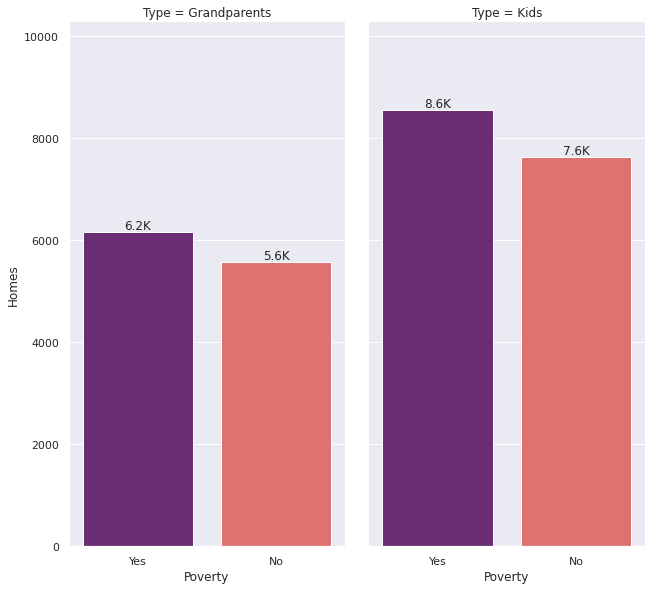

In [ ]:
sb.set(font_scale=1)
poverty_graph = sb.catplot(x="Poverty",y="Homes",col="Type",data=poverty,
                            kind="bar",height=4,aspect=.7,palette='magma')

plt.gcf().set_size_inches(10, 10)
for ax in poverty_graph.axes.ravel():   
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

Se aprecia que la proporción de sentimiento de pobreza es similar tanto en los hogares donde residen niños como en los hogares donde residen abuelos, predominando los hogares que sienten que están en la pobreza.

####Análisis de datos según la tenencia de internet

Ahora se representan los datos sobre los hogares donde residen niños y abuelos que tienen internet.

In [ ]:
internet = data_home.groupby(['Internet','Type'],as_index=False)['Security'].count()
internet.rename(columns={'Security':"Homes"},inplace=True)
internet['Internet'].replace({1:'Yes',2:'No'},inplace=True)

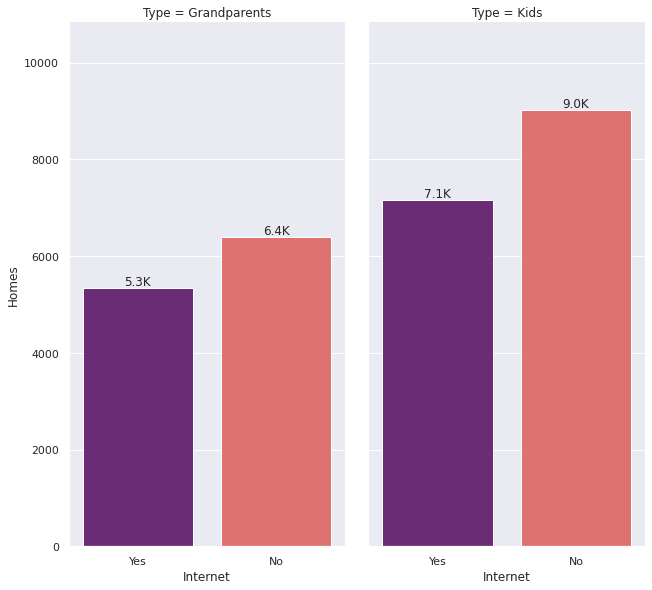

In [ ]:
sb.set(font_scale=1)
internet_graph = sb.catplot(x="Internet",y="Homes",col="Type",data=internet,
                            kind="bar",height=4,aspect=.7,palette='magma')

plt.gcf().set_size_inches(10, 10)
for ax in internet_graph.axes.ravel():   
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

Se nota que hay más hogares donde residen niños sin internet que hogares donde residen abuelos, y se nota una proporción similar en ambos casos.

##Modelo de predicción de satisfacción de los abuelos

Objetivo: Predecir el nivel de satisfacción con la vida de los abuelos.



###Ingeniería de características para los abuelos

In [ ]:
def get_kids(df, directory, seq_p):
  """
    Gets kids' amount of a home
    Arguments:
        df: a pandas dataframe
        directory: an integer
        seq_p: an integer
    Returns:
        The kids' amount of a home
    """

  new_df = df[(df['DIRECTORIO'] == directory) & (df['SECUENCIA_P'] == seq_p) 
            & (df['P6040'] <= 12)]
  return len(new_df)

In [ ]:
def get_teenagers(df, directory, seq_p):
  """
    Gets teenagers' amount of a home
    Arguments:
        df: a pandas dataframe
        directory: an integer
        seq_p: an integer
    Returns:
        The teenagers' amount of a home
    """
  new_df = df[(df['DIRECTORIO'] == directory) & (df['SECUENCIA_P'] == seq_p) 
          & (df['P6040'] > 12) & (df['P6040'] <= 17)]
  return len(new_df)

In [ ]:
def get_sons(df, directory, seq_p):
  """
    Gets head of the family's sons' amount of a home
    Arguments:
        df: a pandas dataframe
        directory: an integer
        seq_p: an integer
    Returns:
        The head of the family's sons' amount of a home
    """
  new_df = df[(df['DIRECTORIO'] == directory) & (df['SECUENCIA_P'] == seq_p) 
          & (df['P6051'] == 3)]
  return len(new_df)

In [ ]:
def get_partners(df, directory, seq_p):
  """
    Gets head of the family's partners' amount of a home
    Arguments:
        df: a pandas dataframe
        directory: an integer
        seq_p: an integer
    Returns:
        The head of the family's partners' amount of a home
    """
  new_df = df[(df['DIRECTORIO'] == directory) & (df['SECUENCIA_P'] == seq_p) 
          & (df['P6051'] == 2)]
  return len(new_df)

In [ ]:
#Create the predictive variables: kids_amount, teenagers_amount, sons_amount,
#has_partner  
grandparents_df['kids_amount'] = grandparents_df.apply (lambda row: 
                                 get_kids(home_composition_df, row['DIRECTORY'], 
                                        row['SEQ_P']), axis=1)
grandparents_df['teenagers_amount'] = grandparents_df.apply (lambda row: 
                                      get_teenagers(home_composition_df, 
                                        row['DIRECTORY'], row['SEQ_P']), axis=1)
grandparents_df['sons_amount'] = grandparents_df.apply (lambda row: 
                                      get_sons(home_composition_df, 
                                        row['DIRECTORY'], row['SEQ_P']), axis=1)
grandparents_df['has_partner'] = grandparents_df.apply (lambda row: 
                                      get_partners(home_composition_df, 
                                        row['DIRECTORY'], row['SEQ_P']), axis=1)

In [ ]:
#Merge the information from home_composition_df & grandparents_df to have an
#unified dataframe with the information for the grandparents
grandparents_info_df = pd.merge(home_composition_df, grandparents_df,
                   how = 'inner',
                   left_on = ['DIRECTORIO', 'SECUENCIA_P', 'SECUENCIA_ENCUESTA'],
                   right_on = ['DIRECTORY', 'SEQ_P', 'SEQ_SURVEY'])

In [ ]:
#Change the variables' types for the variables that will be analyzed
grandparents_info_df[['P1895','P1896','P1897','P1898','P1899','P3175','P1901',
                      'P1903','P1904','P1905','P1927']] = (
                      grandparents_info_df[['P1895','P1896','P1897','P1898',
                      'P1899','P3175','P1901','P1903','P1904','P1905','P1927'
                      ]].astype(np.int64,errors='ignore'))

In [ ]:
#Create a new dataframe to add a new predictive variable in the model
inhabitants_amount_df = home_services_df[['DIRECTORIO', 'SECUENCIA_ENCUESTA', 
                                          'CANT_PERSONAS_HOGAR']]

In [ ]:
#Merge the information from inhabitants_amount_df & home_life_conditions_df
#to have an unified dataframe with the information from a home
home_conditions_df = pd.merge(inhabitants_amount_df, 
                   home_life_conditions_df[['DIRECTORIO','SECUENCIA_ENCUESTA',
                                            'P9030','P9040','P9090']],
                   how='inner', left_on=['DIRECTORIO','SECUENCIA_ENCUESTA'],
                   right_on=['DIRECTORIO','SECUENCIA_ENCUESTA'])

In [ ]:
#Merge the information from home_conditions_df & grandparents_info_df to have an
#unified dataframe with all the information for the grandparents
grandpas_info_df = pd.merge(home_conditions_df, grandparents_info_df,
                   how='inner',left_on=['DIRECTORIO','SECUENCIA_ENCUESTA'],
                   right_on=['DIRECTORIO','SECUENCIA_P'])

In [ ]:
#Erase the irrelevant variables from the grandpas_info_df
granparents_dataset = grandpas_info_df.drop(columns=['DIRECTORIO', 'SECUENCIA_P',
                        'SECUENCIA_ENCUESTA_x', 'SECUENCIA_ENCUESTA_y','ORDEN', 
                        'DIRECTORY','SEQ_P', 'SEQ_SURVEY', 'RELATIONSHIP', 
                        'FEX_C'])


In [ ]:
#Erase the variables that are not integers from the granparents_dataset
granparents_dataset = granparents_dataset.select_dtypes("int")

In [ ]:
#Rename the predictive variables that will be used in the model
granparents_dataset.rename(columns = {'P6020':'sex','P6040':'age',
                           'P1927':'step_in_life','P3175':'free_time_satisfaction',
                           'P1897':'health_satisfaction','P1901':'happiness_yesterday',
                           'P1905':'life_worthiness','P1899':'job_satisfaction',
                           'P1898':'safety_satisfaction','P1903':'worried_level',
                           'P1904':'sadness_level','P9030':'home_life_conditions',
                           'P9040':'childhouse_home','P9090':'home_incomes',
                           'P1895':'life_satisfaction'},
                           inplace = True)

In [ ]:
#Create a grandparents dataset containing only the predictive variables and the
#variable that will be predicted
granparents_dataset = granparents_dataset[['step_in_life',
                        'free_time_satisfaction','health_satisfaction',
                        'happiness_yesterday','life_worthiness','job_satisfaction',
                        'safety_satisfaction','worried_level','sadness_level',
                        'home_life_conditions','childhouse_home','home_incomes',
                        'kids_amount','teenagers_amount','sons_amount',
                        'has_partner','life_satisfaction']]

In [ ]:
#Show the correlation between the first 9 variables and the life_satisfaction 
#variable that will be predicted
granpd_corr_matrix = granparents_dataset.corr()
granpd_corr_matrix.sort_values(by=['life_satisfaction'], key = lambda col: abs(col),
                        ascending = False)['life_satisfaction'][0:10]

life_satisfaction         1.000000
health_satisfaction       0.533219
happiness_yesterday       0.524353
free_time_satisfaction    0.524037
step_in_life              0.523029
life_worthiness           0.472261
job_satisfaction          0.452287
safety_satisfaction       0.449100
worried_level            -0.348456
sadness_level            -0.345065
Name: life_satisfaction, dtype: float64

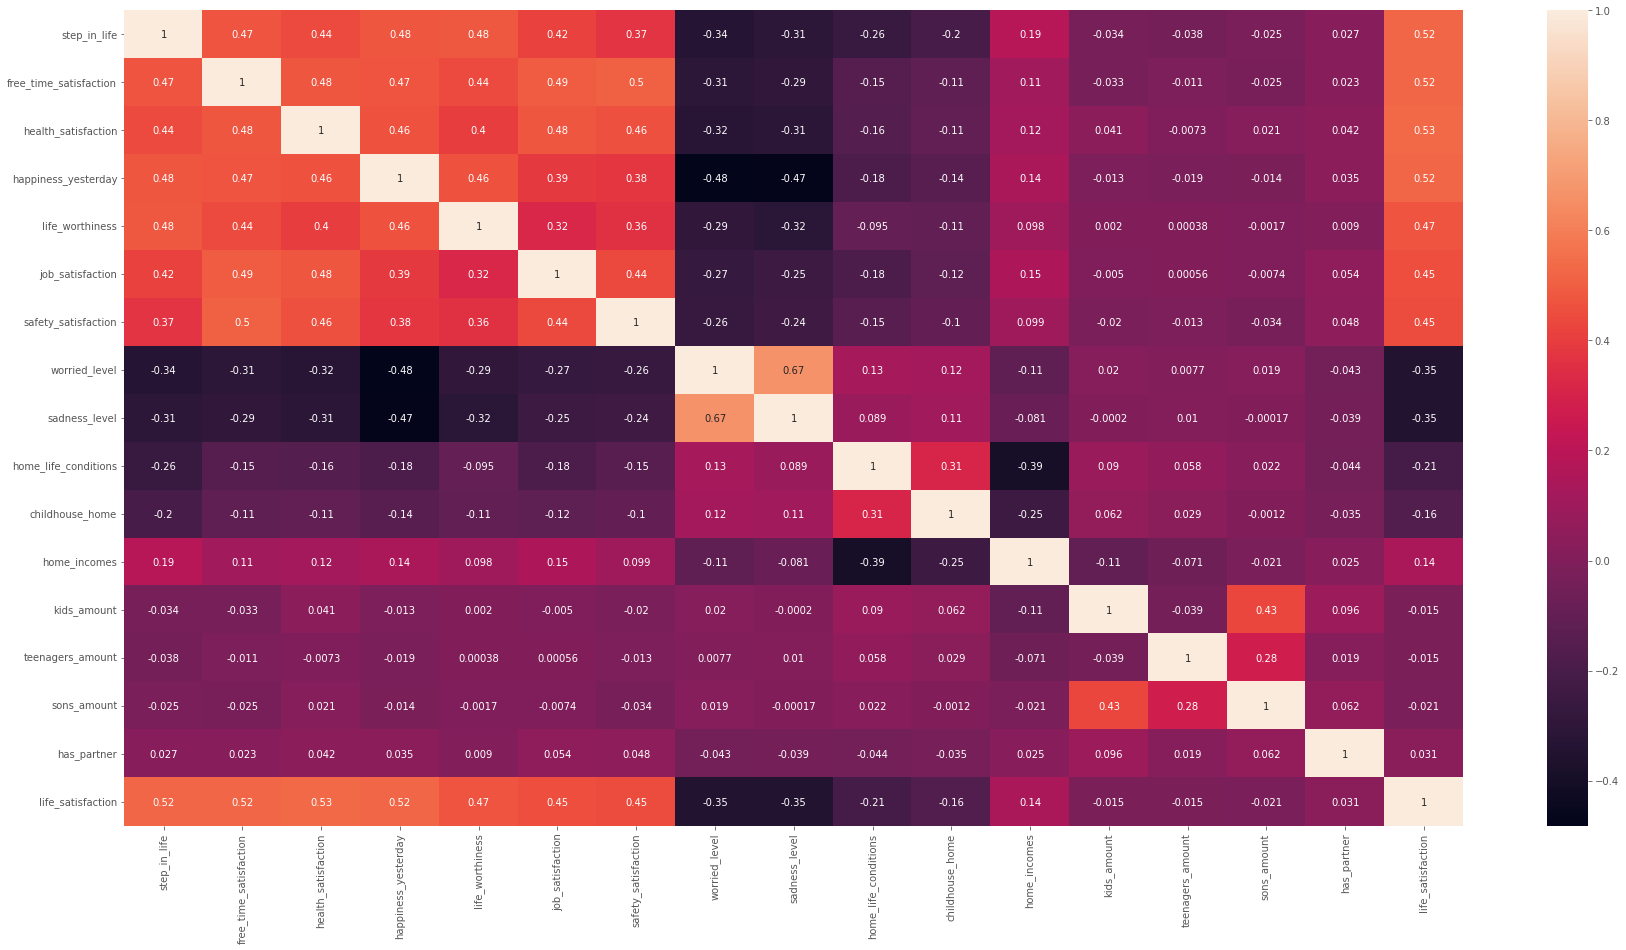

In [ ]:
#Graph the correlation matrix of the variables in the grandparents dataset
sb.heatmap(granpd_corr_matrix, annot=True)
plt.rcParams['figure.figsize'] = (30, 15)
plt.style.use('ggplot')
plt.show()

###Modelo de Regresión Lineal para predecir la satisfacción de los abuelos

In [ ]:
#Separate the predictive variables (x_grandpas) and 
#the predicted variable (y_grandpas)
x_grandpas = granparents_dataset.drop(['life_satisfaction'],axis=1)
y_grandpas = granparents_dataset['life_satisfaction']

In [ ]:
#Split the data in training (80%) and validation (20%) sets
#By using the random state repeatability and reproducibility are guaranteed 
X_train, X_test, y_train, y_test = train_test_split(x_grandpas, y_grandpas, 
                                   test_size = 0.2, random_state = 9)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13664, 16) (13664,)
(3417, 16) (3417,)


In [ ]:
#Create a regression model from the sklearn library
regr_model = linear_model.LinearRegression()

In [ ]:
#Train the model with the training set
regr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predict the life_satisfaction
y_predicted = regr_model.predict(X_test)

In [ ]:
#Show the linear regression model's metrics
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, y_predicted)))
print("R squared error: %.2f" % r2_score(y_test, y_predicted))

Mean squared error: 1.70
Root Mean squared error: 1.30
R squared error: 0.48


In [ ]:
#Export the grandparents model to use in production
joblib_grandparents_file = "granparents_model.pkl"
joblib.dump(regr_model, joblib_grandparents_file)

['granparents_model.pkl']

In [ ]:
#Calculate the accuracy and predictions of the exported model
#to verify the grandparents model was exported correctly
joblib_granparents_model = joblib.load(joblib_grandparents_file)
score = joblib_granparents_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 47.98 %


##Modelo de predicción de satisfacción de los niños

Objetivo: Predecir el nivel de satisfacción con la vida de los niños.


###Ingeniería de características para los niños

In [ ]:
#Create the predictive variable: goods_quantity
kids_info_df['goods_quantity'] = kids_info_df.loc[:, ['P1077S8','P1077S10',
                                'P1077S13','P1077S14','P1077S15A1','P1077S16A1',
                                'P1077S17','P1077S21A1','P1077S22A1',
                                'P1077S23A1']].sum(axis=1)

In [ ]:
#Create the predictive variable: parents_number
kids_info_df['parents_number'] = kids_info_df.apply(lambda row: 2
if (row['P6081'] == 1 and row['P6083'] == 1) else 
(1 if ((row['P6081'] == 1 and row['P6083'] != 1) or 
       (row['P6081'] != 1 and row['P6083'] == 1)) else 0), axis=1)

In [ ]:
#Select the variables that are integers from the kids_info_df
kids_dataset = kids_info_df.select_dtypes("int")

In [ ]:
#Drop the irrelevant variables from the kids_dataset
kids_dataset.drop(columns=['DIRECTORIO','SECUENCIA_ENCUESTA_x','SECUENCIA_P',
                          'ORDEN','P6016','P1894','P6020','P6034','P6040',
                          'P6051','P756','P6081','P6083','P1896','P1899',
                          'SECUENCIA_ENCUESTA_y','P1077S8','P1077S10',
                          'P1077S13','P1077S14','P1077S15A1','P1077S16A1',
                          'P1077S17','P1077S21A1','P1077S22A1','P1077S23A1',
                          'P6080'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Rename the predictive variables that will be used in the model for the kids
kids_dataset.rename(columns={'P1927':'step_in_life','P3175':'free_time_satisfaction',
                           'P1897':'health_satisfaction','P1901':'happiness_yesterday',
                           'P1905':'life_worthiness','P1895':'life_satisfaction',
                           'P1898':'safety_satisfaction','P1903':'worried_level',
                           'P1904':'sadness_level','P9030':'home_life_conditions',
                           'P9040':'childhouse_home','P1075':'has_internet',
                           'P5230':'poverty','P9050':'live_after_5_years'},
                  inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Show the correlation between the variables and the life_satisfaction variable 
#which will be predicted
kids_corr_matrix = kids_dataset.corr()
kids_corr_matrix.columns
kids_corr_matrix.sort_values(by=['life_satisfaction'], key=lambda col: abs(col), 
                             ascending=False)['life_satisfaction']

life_satisfaction         1.000000
health_satisfaction       0.594574
free_time_satisfaction    0.571616
happiness_yesterday       0.562534
life_worthiness           0.550937
step_in_life              0.514279
safety_satisfaction       0.487348
worried_level            -0.353735
sadness_level            -0.324929
home_life_conditions     -0.155124
childhouse_home          -0.140467
poverty                   0.132269
live_after_5_years       -0.131371
has_internet             -0.117224
parents_number            0.038521
goods_quantity            0.026038
Name: life_satisfaction, dtype: float64

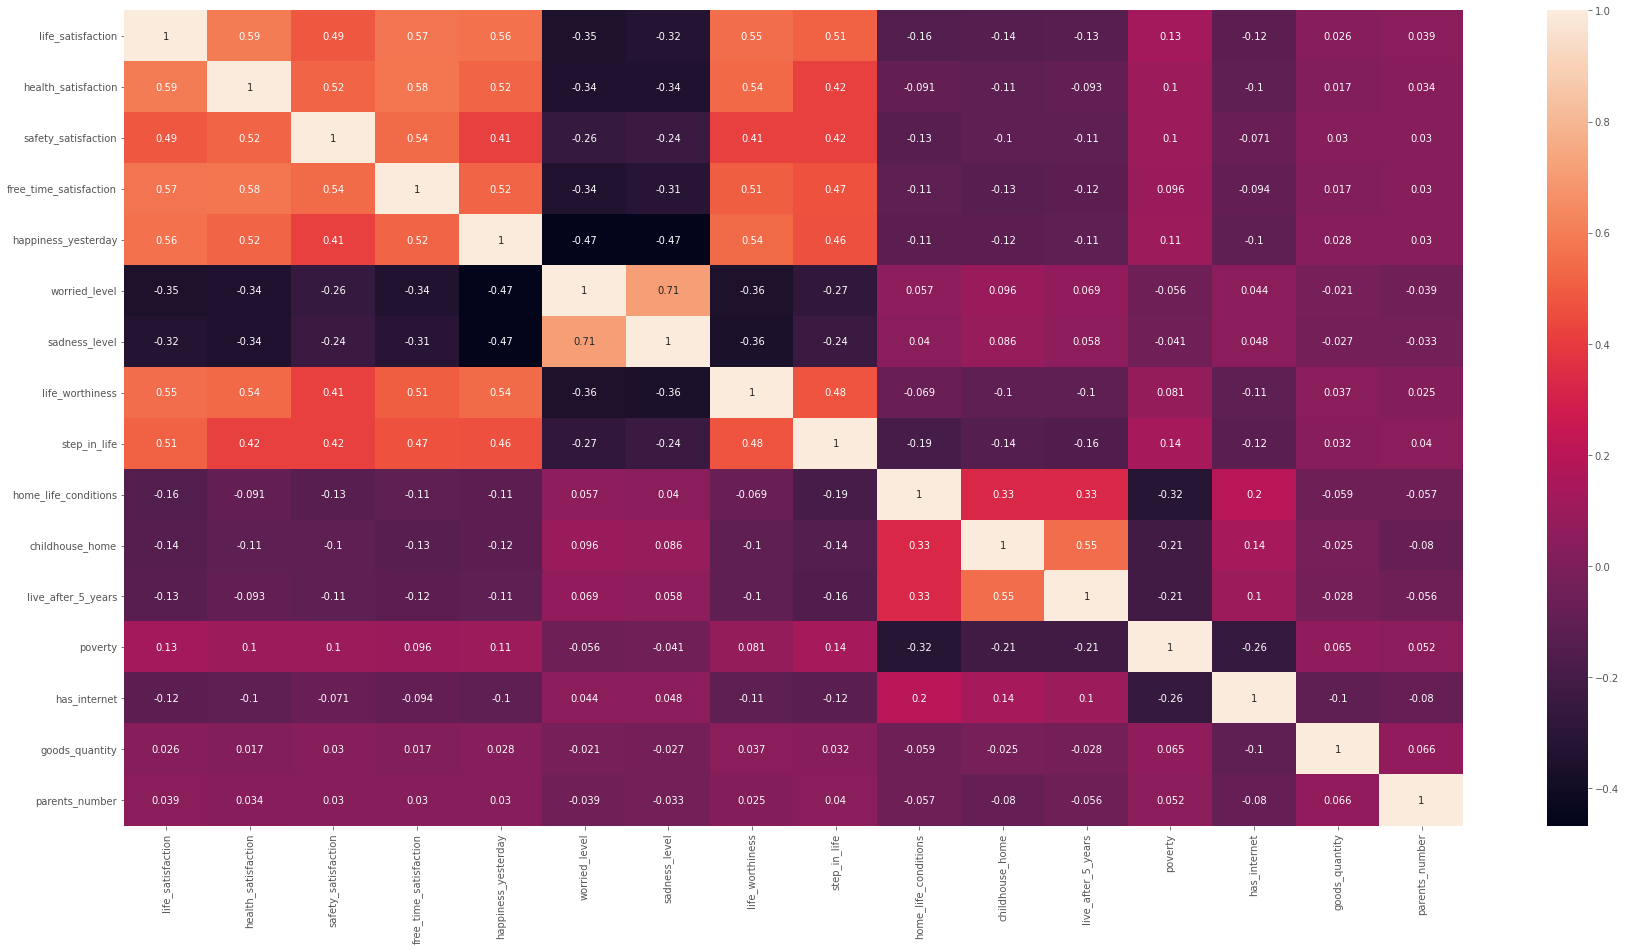

In [ ]:
#Graph the correlation matrix of the variables in the kids dataset
sb.heatmap(kids_corr_matrix, annot=True)
plt.rcParams['figure.figsize'] = (30, 15)
plt.style.use('ggplot')
plt.show()

###Modelo de Regresión Lineal para predecir la satisfacción de los niños

In [ ]:
#Separate the predictive variables (x_grandpas) and 
#the predicted variable (y_grandpas)
x_kids = kids_dataset.drop(['life_satisfaction'],axis=1)
y_kids = kids_dataset['life_satisfaction']

In [ ]:
#Split the data in training (80%) and validation (20%) sets
#By using the random state repeatability and reproducibility are guaranteed 
X_trainkids, X_testkids, y_trainkids, y_testkids = train_test_split(x_kids, 
                                      y_kids, test_size=0.2,random_state=9)

print (X_trainkids.shape, y_trainkids.shape)
print (X_testkids.shape, y_testkids.shape)

(14900, 15) (14900,)
(3726, 15) (3726,)


In [ ]:
#Create a regression model from the sklearn library
regr_modelkids =  linear_model.LinearRegression()

In [ ]:
#Train the model with the training set
regr_modelkids.fit(X_trainkids, y_trainkids)

LinearRegression()

In [ ]:
#Predict the life_satisfaction
y_predictkids = regr_modelkids.predict(X_testkids)

In [ ]:
#Show the linear regression model's metrics
print("Mean squared error: %.2f" % mean_squared_error(y_testkids, y_predictkids))
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_testkids, y_predictkids)))
print("R squared error: %.2f" % r2_score(y_testkids, y_predictkids))

Mean squared error: 1.22
Root Mean squared error: 1.11
R squared error: 0.54


In [ ]:
#Export the kids model to use in production
joblib_kids_file = "kids_model.pkl"
joblib.dump(regr_modelkids, joblib_kids_file)

['kids_model.pkl']

In [ ]:
#Calculate the accuracy and predictions of the exported model
#to verify the kids model was exported correctly
joblib_kids_model = joblib.load(joblib_kids_file)
score = joblib_kids_model.score(X_testkids, y_testkids)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 53.91 %
